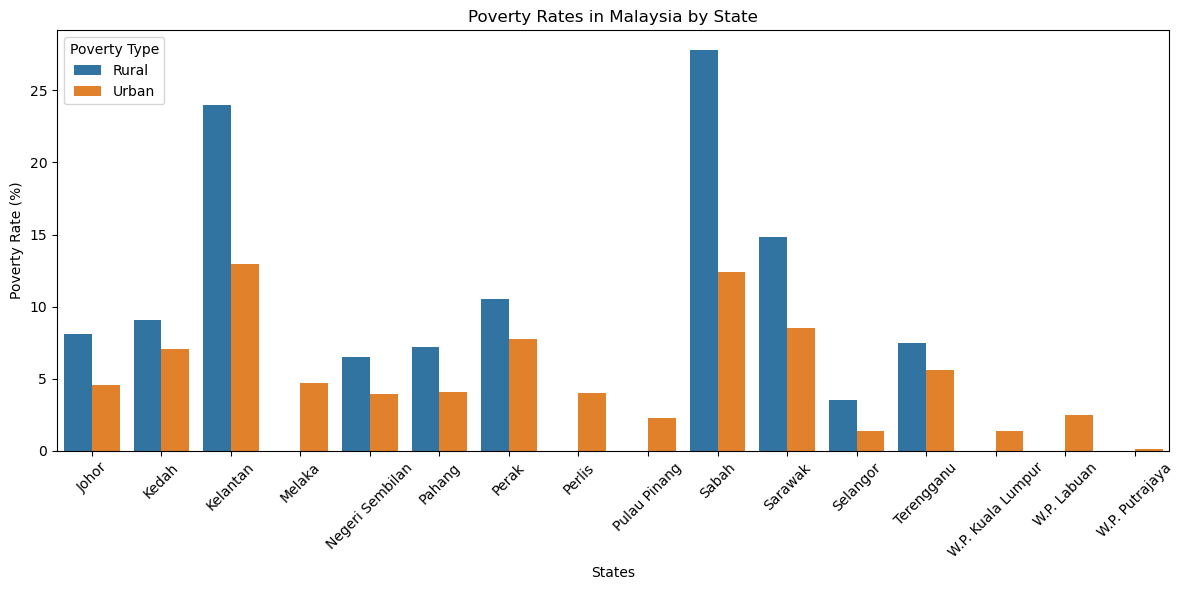

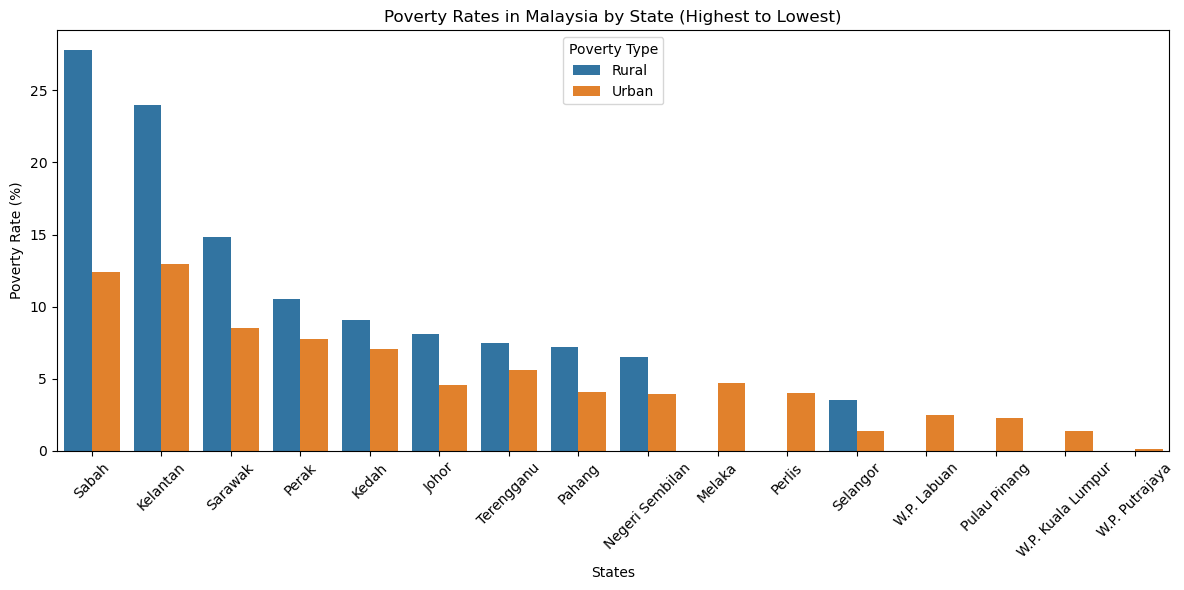

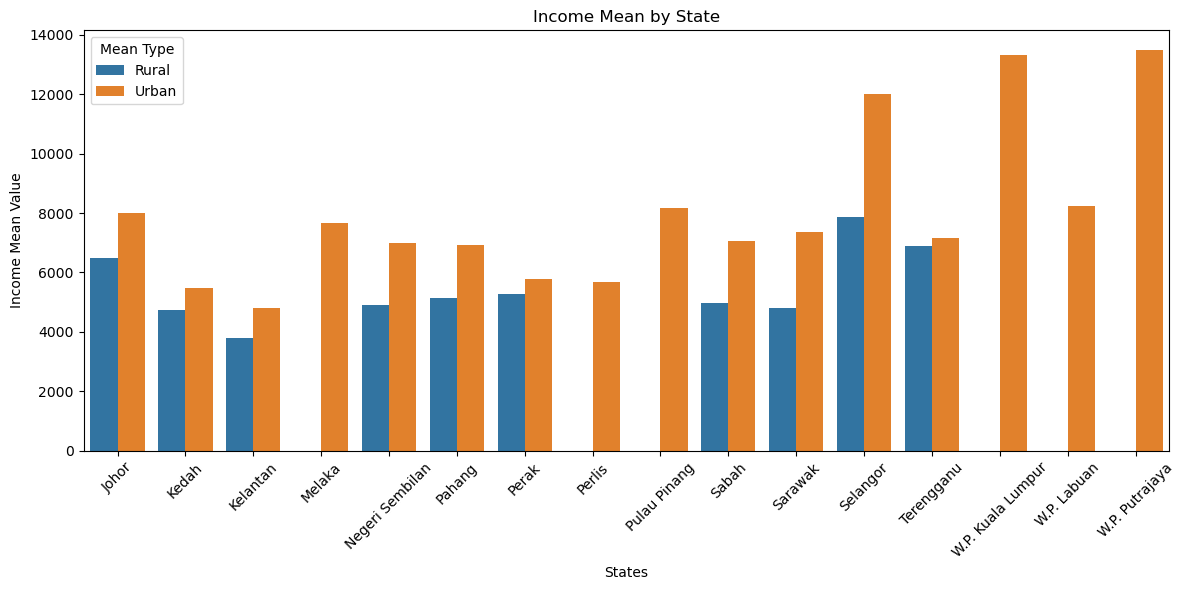

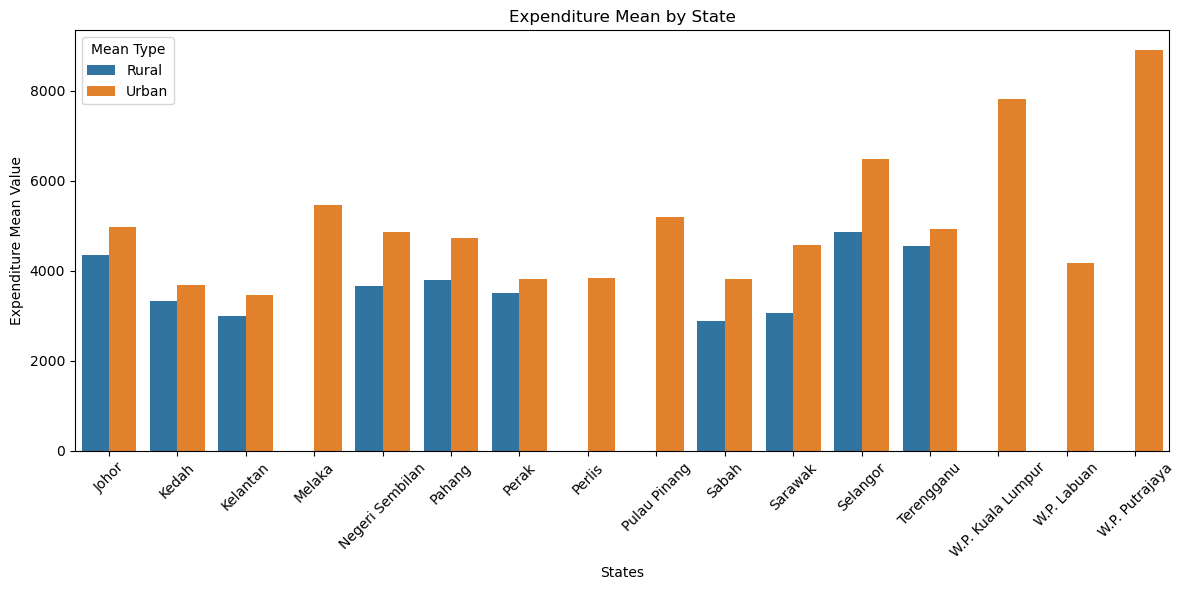

                state   type   income_mean  income_median  expenditure_mean  \
0               Johor  Rural   6498.500000         5261.0       4338.750000   
1               Johor  Urban   8007.166667         6035.5       4971.333333   
2               Kedah  Rural   4724.666667         3703.0       3337.666667   
3               Kedah  Urban   5467.666667         4498.0       3685.222222   
4            Kelantan  Rural   3789.750000         2834.5       2986.000000   
5            Kelantan  Urban   4817.571429         3508.0       3466.142857   
6              Melaka  Urban   7657.666667         5895.0       5452.666667   
7     Negeri Sembilan  Rural   4888.600000         3830.0       3655.800000   
8     Negeri Sembilan  Urban   6977.000000         5594.5       4862.500000   
9              Pahang  Rural   5143.500000         4215.5       3794.700000   
10             Pahang  Urban   6938.000000         5926.0       4724.000000   
11              Perak  Rural   5267.666667         4

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This class contains the function for reading and merging data in both CSV files
class loadData:
    def __init__(self, hies_file_path, poverty_file_path):
        self.hies_file_path = hies_file_path
        self.poverty_file_path = poverty_file_path

    # Read the provided data and remove the data that has missing values
    # Returns a tuple after removing the missing values 
    def readAndRemoveMissingData(self):
        hies_data = pd.read_csv(self.hies_file_path)
        poverty_data = pd.read_csv(self.poverty_file_path)

        # Clean the data by removing any rows with missing values
        hies_data.dropna(inplace=True)
        poverty_data.dropna(inplace=True)

        #filter 2022 data
        poverty_data = poverty_data[(poverty_data['age'] == 'overall') & 
                   (poverty_data['date'] == '2022-01-01') & 
                   (poverty_data['sex'] == 'both') & 
                   (poverty_data['ethnicity'] == 'overall')]

        # Return a tuple without missing values
        return hies_data, poverty_data

# This class contains the function for analyzing merged data
class analyseData:
    def __init__(self, hies_data, poverty_data):
        self.hies_data = hies_data
        self.poverty_data = poverty_data

    def mergeData(self, hies_data, poverty_data):
        # Aggregate population data by district and sort by population
        poverty_data = poverty_data.groupby('district')['population'].sum().reset_index()
        poverty_data = poverty_data.sort_values(by='population', ascending=False)
    
        # Merge hies_data and poverty_data on 'district'
        merged_data = pd.merge(hies_data, poverty_data, on='district', how='inner')
    
        # Convert population to the appropriate unit (e.g., thousands to match hies_data)
        merged_data['population'] *= 1000
    
        # Calculate density and categorize areas as 'Urban' or 'Rural'
        merged_data['density'] = merged_data['population'] / merged_data['Area (km2)']
        density_threshold = 150
        merged_data['type'] = merged_data['density'].apply(lambda x: 'Urban' if x >= density_threshold else 'Rural')

        # Group by state and type (urban/rural) and calculate mean values
        aggregated_data = merged_data.groupby(['state', 'type']).agg({
            'income_mean': 'mean',
            'income_median': 'median',
            'expenditure_mean': 'mean',
            'gini': 'mean',
            'poverty': 'mean',
            'population': 'mean'
        }).reset_index()

        return aggregated_data

    def plotPovertyRates(self, aggregated_data):
        #Plot the overall, rural, and urban poverty rates by state.
        #Additionally, plot the overall poverty rates sorted from highest to lowest.
      
        # Plot 1: Bar Plot Poverty Rates by State
        plt.figure(figsize=(12, 6))
        sns.barplot(data= aggregated_data, x='state', y='poverty', hue='type')
        plt.title('Poverty Rates in Malaysia by State')
        plt.xlabel('States')
        plt.ylabel('Poverty Rate (%)')
        plt.xticks(rotation=45)
        plt.legend(title='Poverty Type')
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot

        # Plot 2: Bar Plot Poverty Rates by State (Highest to Lowest)
        sorted_data = aggregated_data.sort_values(by='poverty', ascending=False)
        plt.figure(figsize=(12, 6))
        sns.barplot(data= sorted_data, x='state', y='poverty', hue='type')
        plt.title('Poverty Rates in Malaysia by State (Highest to Lowest)')
        plt.xlabel('States')
        plt.ylabel('Poverty Rate (%)')
        plt.xticks(rotation=45)
        plt.legend(title='Poverty Type')
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot

        # Plot 3: Line Plot Income Mean by State (Rural and Urban Areas Income Mean)
        plt.figure(figsize=(12, 6))
        sns.barplot(data= aggregated_data, x='state', y='income_mean', hue='type')
        plt.title('Income Mean by State')
        plt.xlabel('States')
        plt.ylabel('Income Mean Value')
        plt.xticks(rotation=45)
        plt.legend(title='Mean Type')
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot

        # Plot 3: Line Plot Expenditure Mean by State (Rural and Urban Areas Expenditure Mean)
        plt.figure(figsize=(12, 6))
        sns.barplot(data= aggregated_data, x='state', y='expenditure_mean', hue='type')
        plt.title('Expenditure Mean by State')
        plt.xlabel('States')
        plt.ylabel('Expenditure Mean Value')
        plt.xticks(rotation=45)
        plt.legend(title='Mean Type')
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot

# This class contains the function for saving the data after calculation to new CSV files
class saveData:
    def __init__(self, output_file):
        self.output_file = output_file
        
    # Prompt the system to save the new CSV files
    def saveToCSVFile(self, data):
        data.to_csv(self.output_file, index=False)

# Prompting the system to run the functions
class displayPovertyRates:
    
    # Setting variables for each CSV file
    # The system is being prompted to access data for further processing
    def __init__(self, hies_file_path, poverty_file_path, output_file):
        self.hies_file_path = hies_file_path
        self.poverty_file_path = poverty_file_path
        self.output_file = output_file

    # Run all the functions
    def dataRun(self):
        # Step 1: Load and clean the data
        loadingData = loadData(self.hies_file_path, self.poverty_file_path)
        hies_data, poverty_data = loadingData.readAndRemoveMissingData()

        # Step 2: Analyze the poverty rates
        analyzer = analyseData(hies_data, poverty_data)  # Corrected class name
        results = analyzer.mergeData(hies_data, poverty_data)

        # Step 3: Save the analysis to a CSV file
        saving = saveData(self.output_file)
        saving.saveToCSVFile(results)

        # Step 4: Plot the poverty rates
        analyzer.plotPovertyRates(results)

        # Display the results
        print(results)

# Inform the system about the CSV files names
if __name__ == "__main__":
    # Define file paths and output file
    hies_file = 'hies_district1.csv'
    poverty_file = 'population_districts.csv'
    # Create the new CSV with the selected name
    output_file = 'Poverty_Rates_In_Malaysia.csv'

    # Create an instance of the coordinator class and run the analysis
    generatingData = displayPovertyRates(hies_file, poverty_file, output_file)
    generatingData.dataRun()